In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [38]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [43]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Area


Basic information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
df.shape

(267, 9)

In [11]:
df.columns
#it describe the attribute of the table

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Formatting the Dataframe

In [13]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [14]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [15]:
# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [16]:
# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

In [17]:
# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))


In [18]:
# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [19]:
# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [20]:
df.head()


,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


EDA

Basic statistics

In [21]:
df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [22]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 
                                       'Estimated Labour Participation Rate']].mean().reset_index()
round(region_stats, 2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

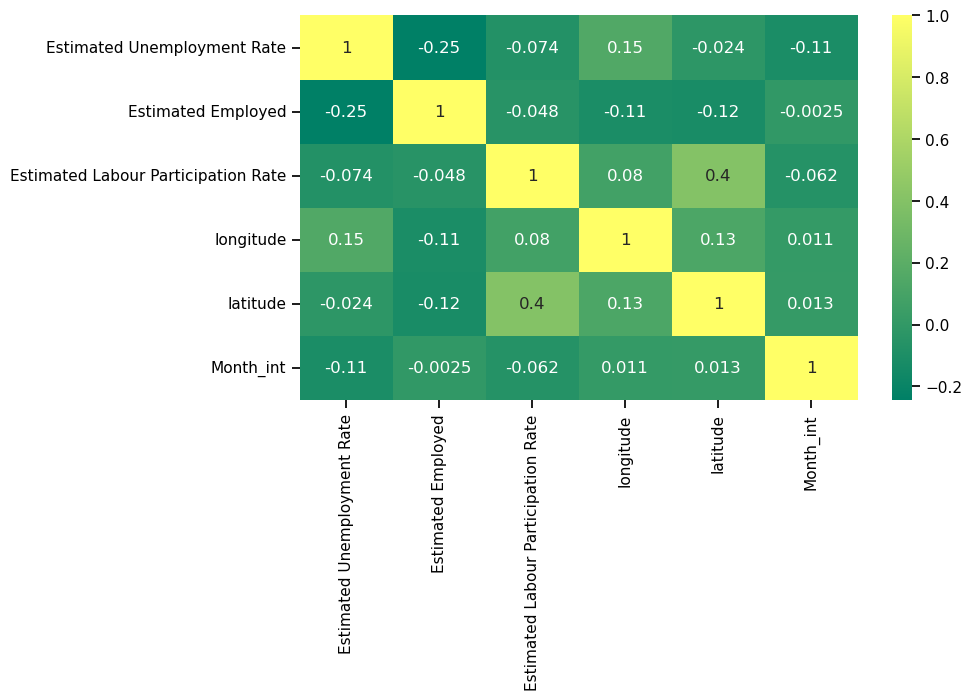

In [23]:
# Correlation Heatmap
heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(9, 5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')
plt.show

Unemployment Rate Analysis: Data Visualization

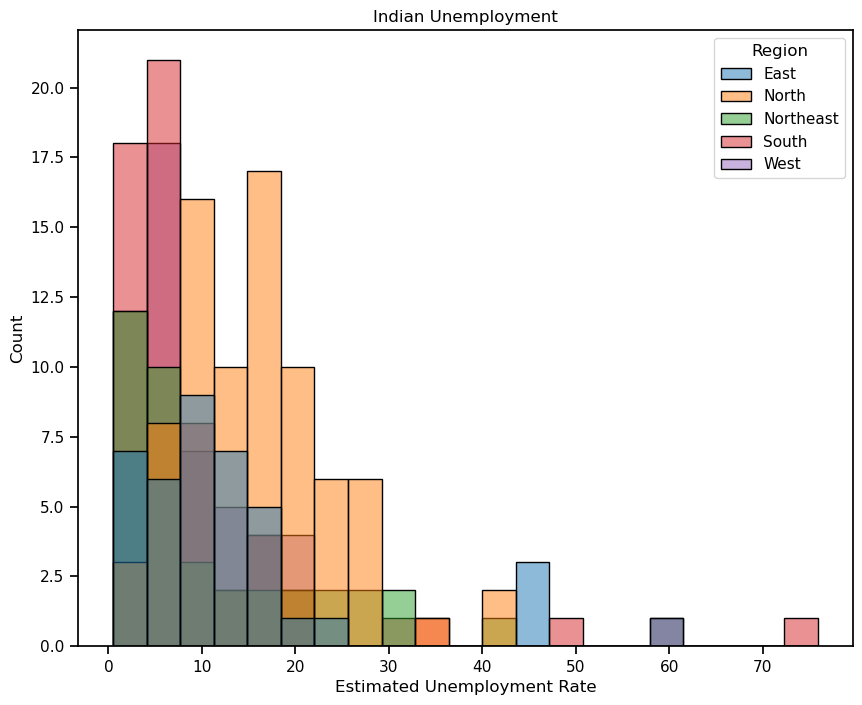

In [24]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [26]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [27]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment Rate Per States', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [28]:
# Scatter matrix

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region')
fig.show()

In [29]:
# Bar plot of average Unemployment Rate by State

plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

Haryana and Tripura have long been the most unemployed

In [30]:
# Animated bar plot of Unemployment rate across region from Jan.2020 to Oct.2020

fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

We see that during the month of April, the states Puducherry, Tamil Nadu, Jharkhand, Bihar, Tripura, Haryana of India saw the major unemplyment hike.

In [31]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

$Impact of Lockdown on States Estimated Employed$

In [33]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)
fig.show()

The northern regions of India seems to have more unemployed people.

In [34]:
#data representation before and after the lockdown
after_lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <=6)]
before_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

In [35]:
af_lockdown=after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown= before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['Unemployment Rate before lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
lockdown.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,9.4025,13.750000
1,Assam,6.2250,7.070000
2,Bihar,20.7425,36.806667
3,Chhattisgarh,7.2450,9.380000
4,Delhi,17.6975,25.713333


In [36]:
lockdown['rate change in unemployment'] = round(lockdown['Unemployment Rate After Lockdown'] -lockdown['Unemployment Rate Before Lockdown']/lockdown['Unemployment Rate Before Lockdown'],2)
plot_per = lockdown.sort_values('rate change in unemployment')

In [37]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='rate change in unemployment',color='rate change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

Most impacted States/Union Territories

Puducherry-Jharkhand-Bihar-Haryana-Tamil Nadu

In [44]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 46:
        return 'hardest impacted States'
    return x

In [45]:
plot_per['impact status'] = plot_per['rate change in unemployment'].apply(lambda x:sort_impact(x))

In [47]:
fig = px.bar(plot_per, y='States',x='rate change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)
fig.show()